This notebook is just for scratchwork to test out python syntax.


In [1]:
import pandas as pd

path='/Users/lisacombs/Documents/BIGDATA/lab-3-spark-lcombs/tracks.csv'

data = pd.read_csv(path, header=None, names = ['track_id', 'name', 'genre', 'year', 'duration', 'artist_id'])
data.head()

,track_id,name,genre,year,duration,artist_id
0,TRAAAAK128F9318786,Scream,Adelitas Way,2009,213.94240,ARJNIUY12298900C91
1,TRAAAAV128F421A322,A Poor Recipe For Civic Cohesion,Cognicide,2005,118.07302,AR73AIO1187B9AD57B
2,TRAAACN128F9355673,Hit Da Scene,A Bad Azz Mix Tape IV,0,252.94322,AR9Q9YC1187FB5609B
3,TRAAADZ128F9348C2E,Amor De Cabaret,Las Numero 1 De La Sonora Santanera,0,177.47546,ARKRRTF1187B9984DA
4,TRAAAEA128F935A30D,I'll Slap Your Face (Entertainment USA Theme),Vile Pervert - The Music,2001,129.85424,ARSVTNL1187B992A91


In [2]:
users = pd.Series(data['artist_id'].unique()).tolist()
len(users)

33922

In [3]:
from random import sample 

temp=sample(users, int(len(users)*0.6) )
train=data[data['artist_id'].isin(temp)]# all interactions
test_val=data[~data['artist_id'].isin(temp)]

In [4]:
users = pd.Series(test_val['artist_id'].unique()).tolist()
temp=sample(users, int(len(users)*0.5) )
test=test_val[test_val['artist_id'].isin(temp)]# all interactions
val=test_val[~test_val['artist_id'].isin(temp)]

In [5]:
len(users)

13569

In [6]:
len(temp)

6784

In [7]:
len(pd.Series(test['artist_id'].unique()).tolist())

6784

In [8]:
len(pd.Series(val['artist_id'].unique()).tolist())

6785

In [9]:
#https://stackoverflow.com/questions/22472213/python-random-selection-per-group
# 
temp=test.groupby('artist_id').apply(lambda x: x.sample(frac=0.5)).reset_index(drop=True)
len(temp['artist_id'].unique())

5768

In [10]:
len(test['artist_id'].unique())

6784

In [11]:
len(test[test['artist_id'] == 'AR5DHN51187B9B9363'])

0

In [12]:
len(temp[temp['artist_id'] == 'AR5DHN51187B9B9363'])

0

In [13]:
temp[['track_id','artist_id']].groupby('artist_id').count()

,track_id
artist_id,
AR5DF6K1187B98F545,12
AR5DLGF1187B9AF012,2
AR5DU2E1187B9A49C8,2
AR5E2M81187B9A9042,4
AR5E44Z1187B9A1D74,13
...,...
ARZZMWO1187B9AFB36,16
ARZZPGX11E2835E8FA,1
ARZZQZQ12509411C96,2


In [14]:
test[['track_id','artist_id']].groupby('artist_id').count()

,track_id
artist_id,
AR5DF6K1187B98F545,24
AR5DLGF1187B9AF012,5
AR5DU2E1187B9A49C8,5
AR5E2M81187B9A9042,7
AR5E44Z1187B9A1D74,26
...,...
ARZZPGX11E2835E8FA,2
ARZZQZQ12509411C96,4
ARZZRK91187B9A5CA5,28


In [24]:
len(temp[temp['artist_id'] == 'ARZZWAU11F4C8459EA'])

0

In [25]:
len(test[test['artist_id'] == 'ARZZWAU11F4C8459EA'])

1

In [26]:
# how many artists have one track?
tracks_per_artist = test[['track_id','artist_id']].groupby('artist_id').count()
len(tracks_per_artist[tracks_per_artist['track_id'] <= 1])

1016

In [28]:
6784-1016 # OK - do we want to subset before instead?

5768

In [19]:
temp

,track_id,name,genre,year,duration,artist_id
0,TRCMRSB128F93445AF,Ristinolla,Romeo ja Julia,1995,259.29098,AR5DF6K1187B98F545
1,TRWZNWR128F93445AD,Alla Koivupuun,Romeo ja Julia,1995,208.92689,AR5DF6K1187B98F545
2,TRTIZMG128F9344579,Say I Do,The 4th Dimension,2000,208.66567,AR5DF6K1187B98F545
3,TRQCBMF128F934467C,Ikävöin,3. aste,1997,275.95710,AR5DF6K1187B98F545
4,TRCBGYM128F93446CF,Mikä - Movetron,Soittorasia,1996,226.76853,AR5DF6K1187B98F545
...,...,...,...,...,...,...
29658,TRIJUQB128F92FBF41,Rain From The Skies,Step It Up Youthman,1969,170.10893,ARZZRK91187B9A5CA5
29659,TRRTJPN128F92F69D1,I'm Still Waiting,Reggae Chartbusters Vol. 6,1976,314.06975,ARZZRK91187B9A5CA5
29660,TRNZLMJ128F93108DC,Piume di cristallo,Il disordine delle cose,2009,236.38159,ARZZVPC125FEF3238D
29661,TRDROWL128F93108D5,Muscoli di carta,Il disordine delle cose,2009,186.51383,ARZZVPC125FEF3238D


In [29]:
keys = list(temp.columns.values)
keys

['track_id', 'name', 'genre', 'year', 'duration', 'artist_id']

In [30]:
i1 = test.set_index(keys).index
i2 = temp.set_index(keys).index
test[~i1.isin(i2)]

,track_id,name,genre,year,duration,artist_id
17,TRAABHP128F427AEC8,Siempre Ana,Nómada,2002,234.63138,ARE6D0Y119B8667D9F
20,TRAABOW128F42418FB,Hoergeraete,Schimmern,2006,120.99873,ARCJXB41187FB442AD
70,TRAAERS128F14A5562,The Castle (LP Version),Da Capo,0,180.71465,AR9F8TH1187B9B5A83
86,TRAAFHL128F933386A,Las 2:00,Ansiedad,0,181.23710,ARTEOIV11C8A417A4E
88,TRAAFON128F42926FB,Rosemary Recalls,The Man from Snowy River,1985,84.03546,ARRC2JF1187B9B6A93
...,...,...,...,...,...,...
299951,TRZZWXF128F42920D8,I Missed Me,Greatest Hits,1966,152.76363,ARZVTZN1187FB579D4
299966,TRZZYGY128F931CC54,Sans issue,Rouge rêve,0,206.60200,ARRKC4R1187B99A4D9
299987,TRZZZHL128F423C536,Crazy Love (Album Version),Moondance,1970,156.83873,ARNAQSX1187B9ADBE4
299989,TRZZZIP128F92D7F80,Three Piece Swing,Pow Wow Plus,1992,180.87138,ARCDGHG1187B9B17D8


In [1]:
print("The best model was trained with rank = %d and lambda = %.1f, " % (4.2, 4) + "and its RMSE on the test set is %f." % (0.81))


The best model was trained with rank = 4 and lambda = 4.0, and its RMSE on the test set is 0.810000.


In [7]:
# merge with genres
genres = []
for line in open('goodreads_book_genres_initial.json', 'r'):
    genres.append(json.loads(line))

In [14]:
df = pd.DataFrame(genres)
df.head()

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}


In [44]:
genres2 = []
for i in range(0, len(df['genres'])):
    if len(df['genres'][i]) > 0:
        genres2.append(list(df['genres'][i].keys())[0])
    else: 
        genres2.append(None)
df['top-genre'] = genres2

df.head()

,book_id,genres,top-genre
0,5333265,"{'history, historical fiction, biography': 1}","history, historical fiction, biography"
1,1333909,"{'fiction': 219, 'history, historical fiction,...",fiction
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys...","fantasy, paranormal"
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri...",fiction
4,287140,{'non-fiction': 3},non-fiction


In [67]:
df=df.astype({'book_id': 'int'})

In [68]:
items = pd.read_csv('items_test.csv')
items = items.drop("Unnamed: 0", axis=1)
items=items.rename(columns = {'item_id': 'book_id'})

In [75]:
merged = pd.merge(items, df, on='book_id', how = 'inner')
merged=merged.drop('genres', axis=1)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE

In [86]:
tsne = TSNE(n_components=2, random_state=1)
tsne_obj= tsne.fit_transform(merged.iloc[:,0:merged.shape[1]-1])

In [87]:
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                        'top-genre':merged.iloc[:,-1]})

In [88]:
tsne_df.head()

,X,Y,top-genre
0,-0.640518,46.184452,"history, historical fiction, biography"
1,6.705431,31.584175,romance
2,-0.921677,-40.515999,fiction
3,-2.435101,-46.143208,children
4,-54.596619,15.519591,non-fiction


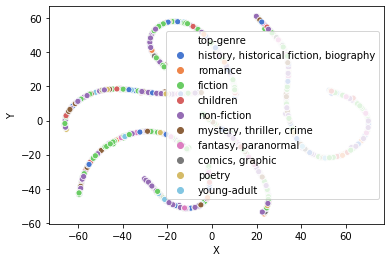

In [89]:
sns.scatterplot(x="X", y="Y",hue="top-genre", palette=sns.color_palette("muted"), legend='full', data=tsne_df)

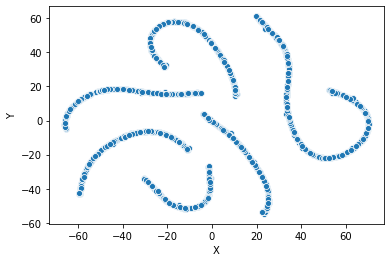

In [90]:
sns.scatterplot(x="X", y="Y", data=tsne_df)

In [438]:
#path='/Users/lisacombs/Documents/BIGDATA/final-project-guess_u_like/tsne_matrix.csv/part-00000-3d9938f1-d1fe-4742-b4dd-ad1a7e099eec-c000.csv'

# 200 rank
path200 = '/Users/lisacombs/Documents/BIGDATA/final-project-guess_u_like/part-00000-d06f1a4f-d24f-4454-aed8-054eed089035-c000.csv'

# 4 rank
path4 = '/Users/lisacombs/Documents/BIGDATA/final-project-guess_u_like/part-00000-cd22b61d-f5dd-469b-84b6-b875f046774d-c000.csv'

sample = 10000
seed=42

In [ ]:
#import matplotlib
#matplotlib.use('Agg')

plt.rcParams['figure.figsize'] = [10,10]

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
from glob import glob
from sklearn import preprocessing

items = pd.read_csv(path200, engine='python', header=None)
print('read data.')
#print(items.head())
num_features = items.shape[1]
items.head()
# sample data
#items = items.sample(n=sample, random_state=seed, replace=False)
items = items.iloc[0:sample, :]
#print('sampled data.')

items=items.sort_values(items.columns[-1])

In [ ]:
items.head()

In [456]:
X = items.iloc[:,1:num_features-1]
standardized_X = preprocessing.scale(X)

In [457]:
#items['code'] = pd.Categorical(items.iloc[:,-1])
#items['code'] = items['code'].cat.codes

In [ ]:
tsne = TSNE(n_components=2, random_state=seed, perplexity=100, n_iter = 750)
tsne_obj= tsne.fit_transform(standardized_X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],'Y':tsne_obj[:,1],'top-genre':items.iloc[:,-1]})

Text(0.5, 1.0, 'tSNE Dimesionality Reduction of Item Factors from ALS Model by Genre')

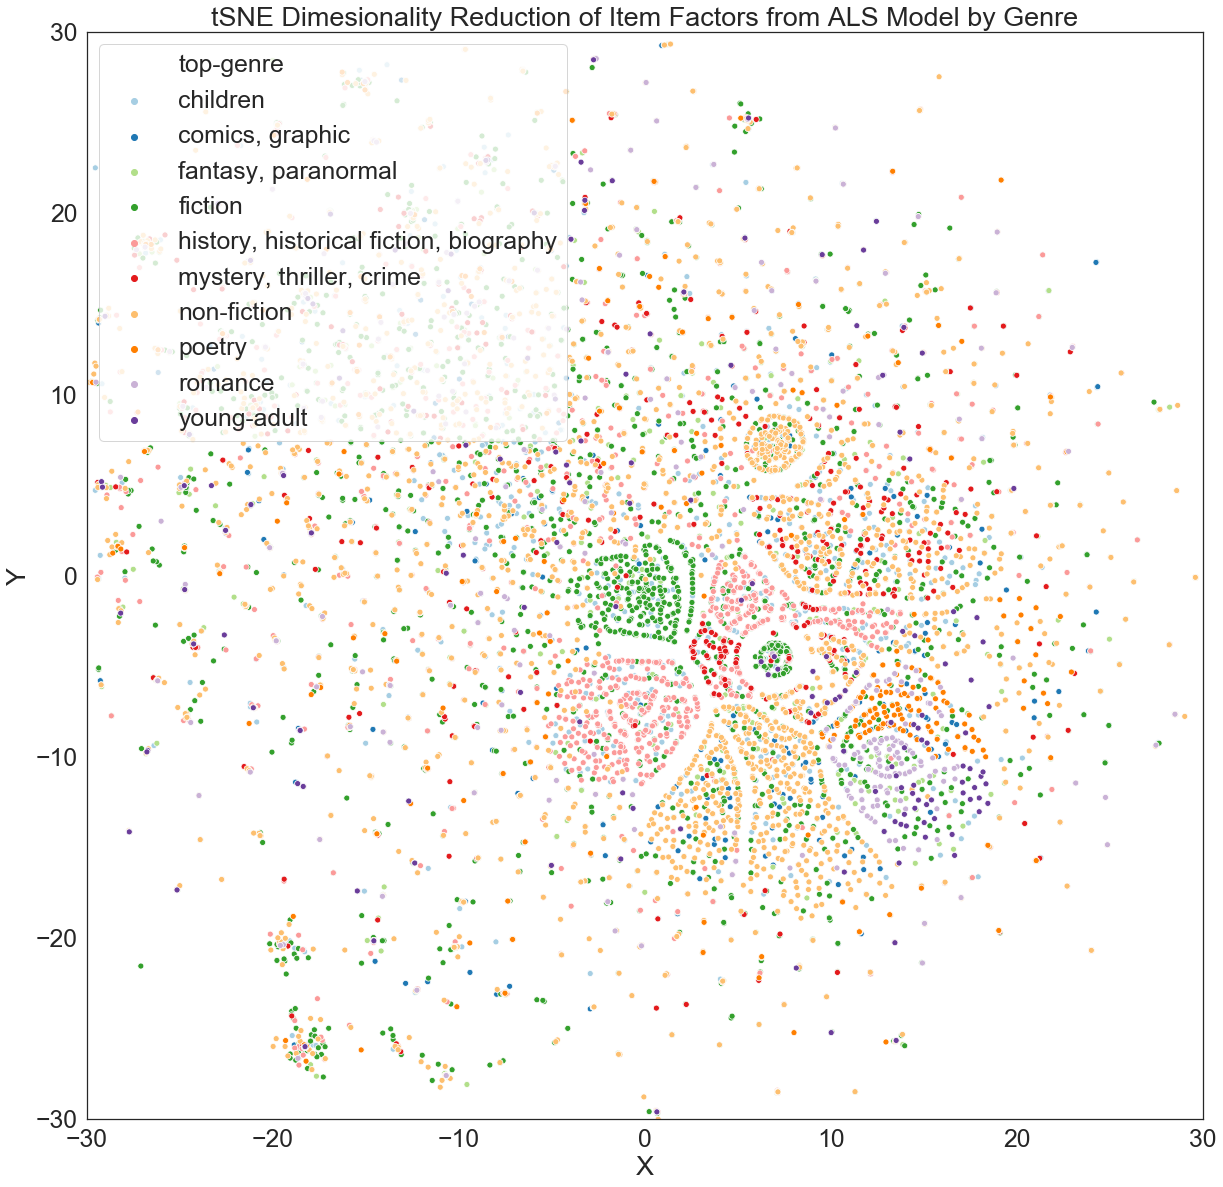

In [468]:

#plt.figure(figsize=(12,12))
#plt.scatter(x=tsne_df['X'], y=tsne_df['Y'], c=items.code, cmap='Spectral')
#plt.legend(items.code, items.iloc[:,-1])

sns.set(font_scale=2.25) 
sns.set_style("white")

plt = sns.scatterplot(
    x="X", y="Y",
    hue="top-genre",
    data=tsne_df,
    legend='brief',
    palette=sns.color_palette("Paired", 10),
    alpha=1)

plt.legend(loc=2)
plt.set(ylim=(-30, 30))
plt.set(xlim=(-30, 30))
plt.set_title('tSNE Dimesionality Reduction of Item Factors from ALS Model by Genre')

#print(tsne_df)
    
#print('plotting data.')

#sns_plot.figure.savefig('tsne_test.png')
#plt.show()

#sns.scatterplot(x="X", y="Y", data=tsne_df)

read data.


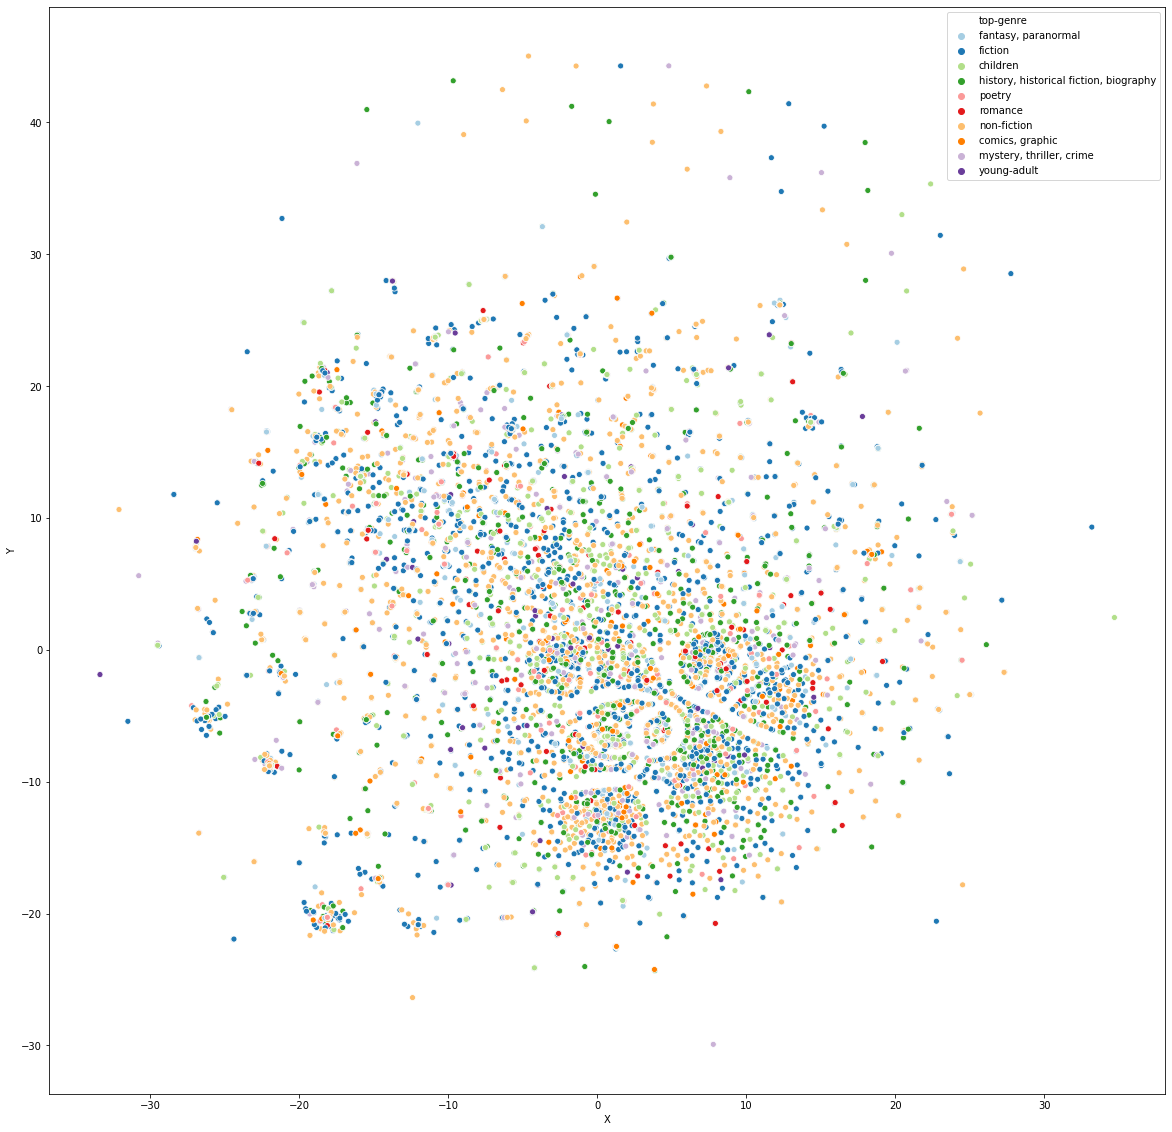

In [435]:

items = pd.read_csv(path200, engine='python', header=None)
print('read data.')
#print(items.head())
num_features = items.shape[1]
items.head()
# sample data
#items = items.sample(n=sample, random_state=seed, replace=False)
items = items.iloc[0:sample, :]
#print('sampled data.')

#items=items.sort_values(items.columns[-1])

X = items.iloc[:,1:num_features-1]
standardized_X = preprocessing.scale(X)

tsne = TSNE(n_components=2, random_state=seed, perplexity=80, n_iter = 600)
tsne_obj= tsne.fit_transform(standardized_X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],'Y':tsne_obj[:,1],'top-genre':items.iloc[:,-1]})

#plt.figure(figsize=(12,12))
#plt.scatter(x=tsne_df['X'], y=tsne_df['Y'], c=items.code, cmap='Spectral')
#plt.legend(items.code, items.iloc[:,-1])

sns.scatterplot(
    x="X", y="Y",
    hue="top-genre",
    data=tsne_df,
    legend="full",
    palette=sns.color_palette("Paired", 10),
    alpha=1,
)

#print(tsne_df)
    
#print('plotting data.')

#sns_plot.figure.savefig('tsne_test.png')
#plt.show()

#sns.scatterplot(x="X", y="Y", data=tsne_df)

read data.


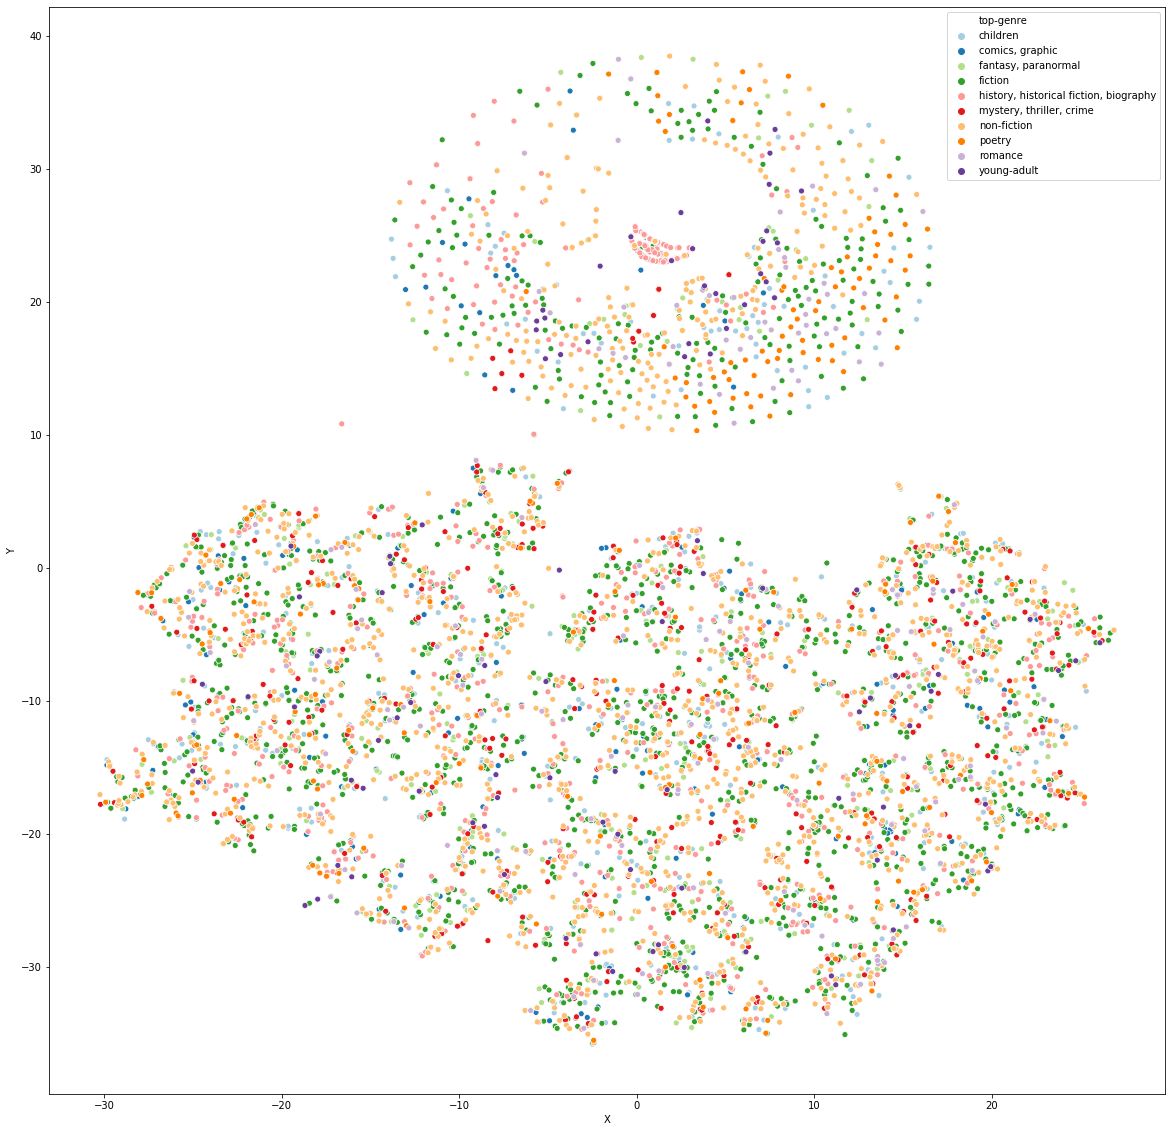

In [436]:
items = pd.read_csv(path4, engine='python', header=None)
print('read data.')
#print(items.head())
num_features = items.shape[1]
items.head()
# sample data
#items = items.sample(n=sample, random_state=seed, replace=False)
items = items.iloc[0:sample, :]
items=items.sort_values(items.columns[-1])
#print('sampled data.')

#print(items.head())

X = items.iloc[:,1:num_features-1]
standardized_X = preprocessing.scale(X)

#items['code'] = pd.Categorical(items.iloc[:,-1])
#items['code'] = items['code'].cat.codes


tsne = TSNE(n_components=2, random_state=seed, perplexity=80, n_iter = 600)
tsne_obj= tsne.fit_transform(standardized_X)
tsne_df = pd.DataFrame({'X':tsne_obj[:,0],'Y':tsne_obj[:,1],'top-genre':items.iloc[:,-1]})

# plt.figure(figsize=(12,12))
# plt.scatter(x=tsne_df['X'], y=tsne_df['Y'], c=items.code, cmap='Spectral')
# plt.legend(items.code, items.iloc[:,-1])

# plt.show()


sns.scatterplot(
    x="X", y="Y",
    hue="top-genre",
    data=tsne_df,
    legend="full",
    palette=sns.color_palette("Paired", 10),
    alpha=1,
)


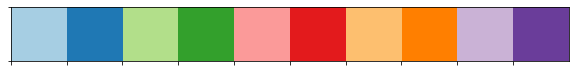

In [437]:
sns.palplot(sns.color_palette("Paired", 10))

In [287]:
#!pip install 'umap-learn==0.3.10'

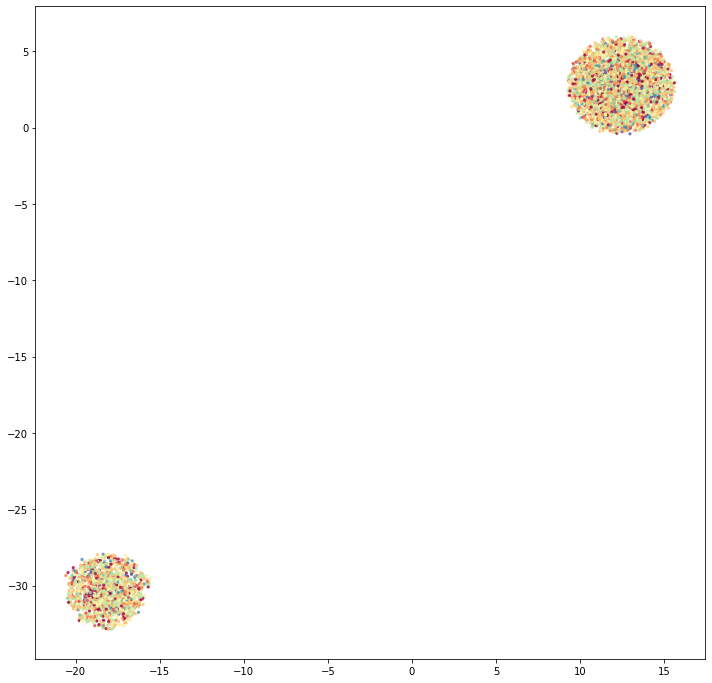

In [288]:
import umap.umap_ as umap
from warnings import filterwarnings
filterwarnings('ignore')


import matplotlib.pyplot as plt

embedding = umap.UMAP( metric='jaccard',
   min_dist=1, n_components=2, n_neighbors=50,
   random_state=42, target_metric='categorical').fit_transform(X)

plt.figure(figsize=(12,12))
plt.scatter(embedding[:,0], embedding[:,1], 
            c=items.code,
            edgecolor='none', 
            alpha=0.80, 
            s=10,
           cmap='Spectral')

#plt.axis('off');